# Alex McEvoy
## Udacity Data Analysis Final Project
## 12/13/17

This analysis will examine data on the number of firearm background checks in the United States, categorized by date, state and weapon type, as correlated with census data collected by the United State Census Bureau. 
  
These data, presented in the __[FBI's National Instant Criminal Background Check System](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md)__, and by the __[The U.S. Census Bureau Census Data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&ust=1513882406707000&usg=AFQjCNHB4dzatlCoIPJbXBsqARWrbWR17Q)__ will be used in an attempt to draw conclusions and answer questions posed in the [Question Phase](#question_phase). 

It's important to note that these data are simply for background checks run per state. Variations in state law and reporting compliance make these figures difficult to verify or relate to gun sales. A one to one relation between a background check and a gun purchase cannot be made, however, a study conducted by Jurgen Brauer of Georgia Regents University utilized a method where each long gun and handgun check was counted as 1.1 sales. Each multiple-gun check was counted as two sales. This is to account for gun purchases between individuals where a background check was not done. This study is available __[here](http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf)__. 




## Import NICS Data

In [1]:
#Import the downloaded database from NICS into our notebook

import unicodecsv

with open('nics-firearm-background-checks.csv', 'rd') as f:
    reader = unicodecsv.DictReader(f)
    background_checks = list(reader)


## Initial Examination
Here's a small slice of our initial dataset to see what kind of information we are working with

In [2]:

background_checks[0:2]

[{u'admin': u'0',
  u'handgun': u'9927',
  u'long_gun': u'11675',
  u'month': u'2017-11',
  u'multiple': u'483',
  u'other': u'292',
  u'permit': u'21670',
  u'permit_recheck': u'400',
  u'prepawn_handgun': u'15',
  u'prepawn_long_gun': u'11',
  u'prepawn_other': u'1',
  u'private_sale_handgun': u'11',
  u'private_sale_long_gun': u'24',
  u'private_sale_other': u'1',
  u'redemption_handgun': u'1302',
  u'redemption_long_gun': u'1602',
  u'redemption_other': u'4',
  u'rentals_handgun': u'0',
  u'rentals_long_gun': u'0',
  u'return_to_seller_handgun': u'0',
  u'return_to_seller_long_gun': u'0',
  u'return_to_seller_other': u'0',
  u'returned_handgun': u'0',
  u'returned_long_gun': u'0',
  u'returned_other': u'0',
  u'state': u'Alabama',
  u'totals': u'47418'},
 {u'admin': u'0',
  u'handgun': u'3132',
  u'long_gun': u'3244',
  u'month': u'2017-11',
  u'multiple': u'226',
  u'other': u'261',
  u'permit': u'336',
  u'permit_recheck': u'7',
  u'prepawn_handgun': u'3',
  u'prepawn_long_gun': 

### Convert list of dictionaries to Pandas DataFrame

I decided to start by converting our dataset to a Pandas DataFrame early on for the following reasons
 - Pre-written Cython library may allow code to run faster than traditional for loop
 - It allows for earlier adoption of more advanced data structures which will offer more practice and greater competence in their use
 - The project criteria focuses on the use of DataFrames



In [3]:
import pandas as pd

checks_df = pd.DataFrame(background_checks)


#Here's a small example of how our data is organized when converted to a Pandas DataFrame
checks_df.head()

,admin,handgun,long_gun,month,multiple,other,permit,permit_recheck,prepawn_handgun,prepawn_long_gun,...,rentals_handgun,rentals_long_gun,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,returned_handgun,returned_long_gun,returned_other,state,totals
0,0,9927,11675,2017-11,483,292,21670,400,15,11,...,0,0,0,0,0,0,0,0,Alabama,47418
1,0,3132,3244,2017-11,226,261,336,7,3,1,...,0,0,0,0,0,19,13,0,Alaska,7527
2,0,13763,10322,2017-11,851,1092,5857,459,11,5,...,0,0,0,1,0,118,10,0,Arizona,34541
3,41,6981,11574,2017-11,566,237,2622,723,14,27,...,0,0,1,3,0,0,0,0,Arkansas,26049
4,0,44710,35910,2017-11,0,4241,54897,0,0,0,...,0,0,0,0,0,0,0,0,California,140695


## Clean Up the Data

I can immediately see that all of the numerical values are in string format. Another intersting point is that the month includes the year in it's string. I would like to convert all numerical information to numerical types to facilitate future calculations and separate out our date strings into month and year. 

### Separating the 'month' column into 'month' and 'year'

In [4]:
# This code splits the month column using the .str.split() function. expand=True separates the single list with 
# two items, into two lists with one item each.

checks_df[['year', 'month']] = checks_df['month'].str.split('-', expand = True)

# Notice the month has only one number now, and there is a new year column at the end of our DF
checks_df.head()

,admin,handgun,long_gun,month,multiple,other,permit,permit_recheck,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,returned_handgun,returned_long_gun,returned_other,state,totals,year
0,0,9927,11675,11,483,292,21670,400,15,11,...,0,0,0,0,0,0,0,Alabama,47418,2017
1,0,3132,3244,11,226,261,336,7,3,1,...,0,0,0,0,19,13,0,Alaska,7527,2017
2,0,13763,10322,11,851,1092,5857,459,11,5,...,0,0,1,0,118,10,0,Arizona,34541,2017
3,41,6981,11574,11,566,237,2622,723,14,27,...,0,1,3,0,0,0,0,Arkansas,26049,2017
4,0,44710,35910,11,0,4241,54897,0,0,0,...,0,0,0,0,0,0,0,California,140695,2017


In [5]:
# Examine all data from year 2016
pd.options.display.max_rows = None

checks_df[checks_df['year'] == '2016'].head()


,admin,handgun,long_gun,month,multiple,other,permit,permit_recheck,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,returned_handgun,returned_long_gun,returned_other,state,totals,year
605,0,13733,17519,12,533,376,26996,0,10,9,...,0,0,0,0,0,0,0,Alabama,62014,2016
606,0,4087,3698,12,191,243,254,0,3,1,...,0,0,0,0,15,8,0,Alaska,8786,2016
607,0,18024,13785,12,703,1180,8900,121,10,4,...,0,0,0,0,80,10,0,Arizona,44887,2016
608,37,9192,13433,12,385,277,3294,692,4,7,...,0,0,0,0,0,0,0,Arkansas,29926,2016
609,0,63649,93224,12,0,77929,61808,0,0,0,...,0,0,0,0,0,0,0,California,298161,2016


### Convert Numerical String Values to Numbers

In [6]:
# First lets select all the columns except for month, state and year using .drop(),
# as our columns to be converted to numerical types
no_month_state_year = checks_df.drop(['month', 'state', 'year'], axis=1).columns

# Then lets use the pd.to_numeric function to convert these columns to a numeric value
checks_df[no_month_state_year] = checks_df[no_month_state_year].apply(pd.to_numeric)

# All columns except for month, state and year are now either int or float
checks_df.head()

,admin,handgun,long_gun,month,multiple,other,permit,permit_recheck,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,returned_handgun,returned_long_gun,returned_other,state,totals,year
0,0.0,9927.0,11675.0,11,483,292.0,21670.0,400.0,15.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alabama,47418,2017
1,0.0,3132.0,3244.0,11,226,261.0,336.0,7.0,3.0,1.0,...,0.0,0.0,0.0,0.0,19.0,13.0,0.0,Alaska,7527,2017
2,0.0,13763.0,10322.0,11,851,1092.0,5857.0,459.0,11.0,5.0,...,0.0,0.0,1.0,0.0,118.0,10.0,0.0,Arizona,34541,2017
3,41.0,6981.0,11574.0,11,566,237.0,2622.0,723.0,14.0,27.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,Arkansas,26049,2017
4,0.0,44710.0,35910.0,11,0,4241.0,54897.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,California,140695,2017


## Import our Census Data

In [7]:
# For our census data, lets use Pandas built in csv reader function, read_csv. 
# This immediately provides us with a Pandas dataframe, which saves us the step of converting it

census_df = pd.read_csv('u.s.-census-data.csv')

type(census_df)

pandas.core.frame.DataFrame

## Initial Examination


In [29]:
# Lets take a quick look at our DataFrame

# Allows us to see all our columns
pd.options.display.max_columns = None

census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2016)",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, (V2016)",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


## Clean Up the Data

I noticed that some of the values are in percentage format (with a % symbol at the end), and some are in decimal form. I also noticed that some larger values have commas in the number while others do not, and that certain monetary values have a dollar sign in the string. To avoid having to correct the entire dataset, I'll wait until after I determine which questions I am going to answer with these data and only clean up the necessary rows and columns.   

In [9]:
# Here are two examples of strings which could complicate calculations due to the inclusion of percent symbols, 
# dollat signs and commas. 

print census_df.iloc[33, 2]
census_df.iloc[25, 2]

5.20%


'$125,500 '

### Examine our Census Data and Formulate Questions

We can first examine the type of data available to us in the census by examining the first column of our dataset,
where each row is the description of the data present in that row, across sates. 


In [10]:

# Allows us to see all of our string variables
pd.set_option('display.max_colwidth', -1)

# using .iloc and slicing utilizes position based access of our DataFrame to return the first column
census_df.iloc[:,0].head()

0    Population estimates, July 1, 2016,  (V2016)                                         
1    Population estimates base, April 1, 2010,  (V2016)                                   
2    Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3    Population, Census, April 1, 2010                                                    
4    Persons under 5 years, percent, July 1, 2016,  (V2016)                               
Name: Fact, dtype: object

<a id="question_phase"></a>
## Question Phase

- Does a higher population percentage equal a higher number of handgun permit checks?
- Does a positive percent change in population correlate with an increase or decrease in gun background checks (both handgun and long gun)? 
- Which state has the highest number of overall background checks in 2016?
  - Within that state, what are the states general demographics?

## Question 1 
### Does a higher population percentage equal a higher number of handgun permit checks?

This is in an attempt to see if there is a correlation between higher populations and higher number of background checks.

For this question, we'll need to compare the population of each state with the total number of background checks
run for handguns. For this I decided to create a DataFrame of each state in the year 2016 (one of the years our 
census data accounts for) and include the states population and total handgun background checks for that year.


In [11]:

# Get all of our handgun background checks for the year in question
st_2016_handguns = checks_df[checks_df['year'] == '2016'].groupby('state')['handgun'].sum()
 
# Get our population information
st_2016_population = census_df.iloc[0, 2:]


# Combine our population and background check info using .concat
st_2016_pop_vs_hand = pd.concat((st_2016_handguns, st_2016_population), axis=1, join='inner')
st_2016_pop_vs_hand.columns = ['Handgun Background checks', 'Population 2016']

print len(st_2016_pop_vs_hand)
st_2016_pop_vs_hand.head()

50


,Handgun Background checks,Population 2016
Alabama,153123.0,"4,863,300"
Alaska,37491.0,"741,894"
Arizona,166784.0,"6,931,071"
Arkansas,80244.0,"2,988,248"
California,560355.0,"39,250,017"


### Convert values from string to floats

In [12]:
# We must first convert our populaton column to floating point type without commas,
# like our "Handgun Background Checks column"

# Make a function to do the conversion
def float_convert(num):
    num = num.replace(',', '')
    return float(num)

st_2016_pop_vs_hand['Population 2016'] = st_2016_pop_vs_hand['Population 2016'].apply(float_convert)

Populating the interactive namespace from numpy and matplotlib


/Users/admin/anaconda3/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


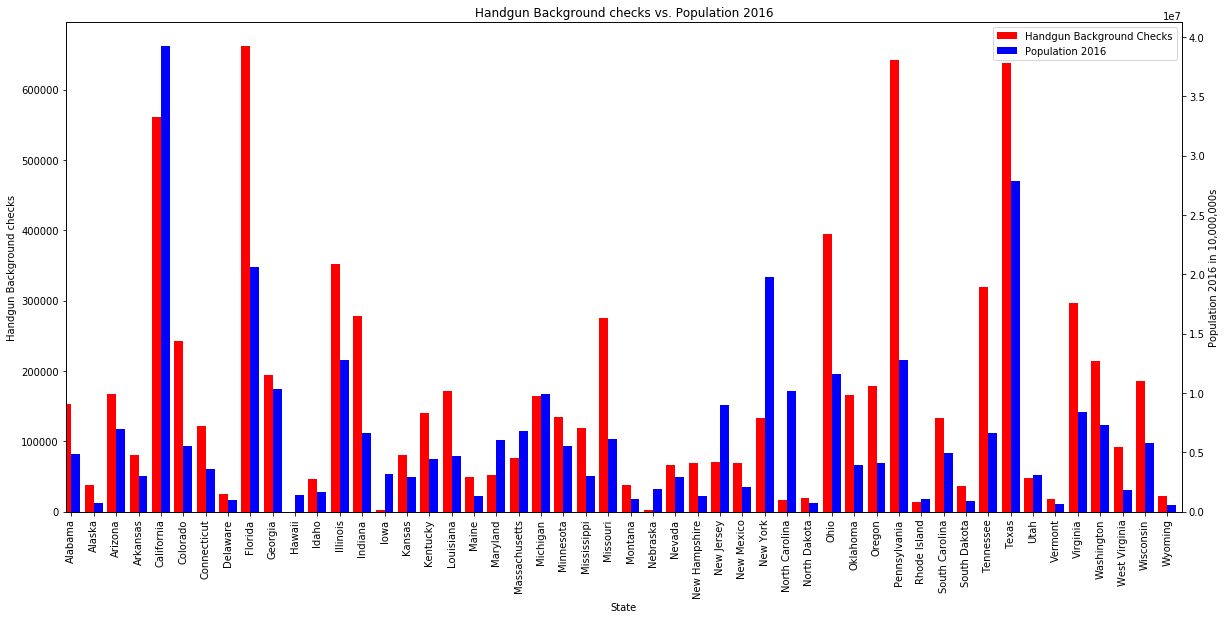

In [13]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create our figure
fig = plt.figure(figsize=(20, 9))

# Add a new axes to the figure,then create a twin of that axes that shares the same x-axis (twinx())
ax = fig.add_subplot(111)
ax2 = ax.twinx()

# This is for our column width, which will be referenced in our plots
width = 0.4

# Plot the two Series. Use the ax and position parameters to prevent our two plots from overlapping
st_2016_pop_vs_hand['Handgun Background checks'].plot(kind='bar', color='red', ax=ax, width=width, position=1, label = "Handgun Background Checks")
st_2016_pop_vs_hand['Population 2016'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label = "Population 2016")

# Add labels to our plot
ax.set_ylabel('Handgun Background checks')
ax.set_xlabel("State")
ax.set_title("Handgun Background checks vs. Population 2016")
ax2.set_ylabel('Population 2016 in 10,000,000s')

# Create our legend using get_legend_handles_labels() to retrieve each axes information
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc=0)


### Normalize the Data

This graph can be a little misleading due to the varied scales with which we are measuring both number of handgun background checks and population sizes. Lets see what the same data looks like when normalize both metrics and graph on the same scale, this time including negative numbers to indicate number of standard deviations below the mean, and positive to indicate standard devs above the mean.

In [14]:
# Lets start by writing a function to standardize our columns, like we did in the lesson 7

def standardize_column(column):
    return (column - column.mean()) / column.std(ddof=1)        # Set ddof to 1 since we are assuming that we're working with a sample


st_2016_pop_vs_hand_standardized = st_2016_pop_vs_hand.apply(standardize_column)

st_2016_pop_vs_hand_standardized.head()

,Handgun Background checks,Population 2016
Alabama,-0.049027,-0.218052
Alaska,-0.733073,-0.784820
Arizona,0.031788,0.066304
Arkansas,-0.480158,-0.475906
California,2.360042,4.510744


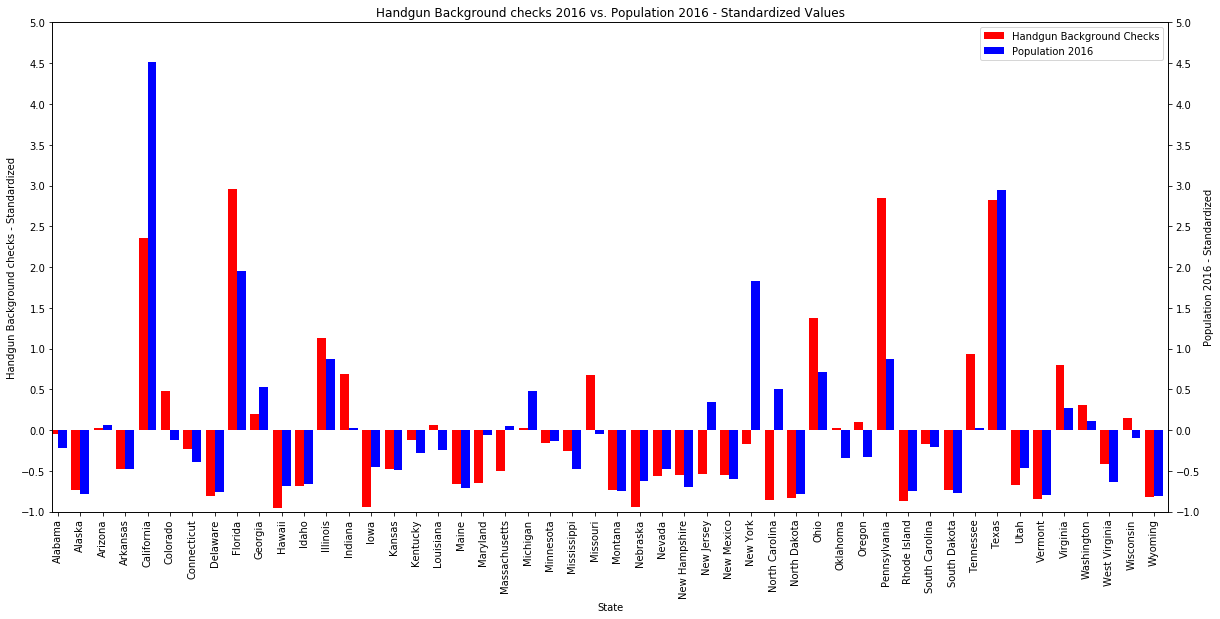

In [15]:
# Create our figure
fig = plt.figure(figsize=(20, 9))

# Add a new axes to the figure,then create a twin of that axes that shares the same x-axis (twinx())
ax = fig.add_subplot(111)
ax2 = ax.twinx()

# This is for our column width, which will be referenced in our plots
width = 0.4

# Plot the two Series. Use the ax and position parameters to prevent our two plots from overlapping
st_2016_pop_vs_hand_standardized['Handgun Background checks'].plot(kind='bar', color='red', ax=ax, width=width, position=1, label = "Handgun Background Checks")
st_2016_pop_vs_hand_standardized['Population 2016'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label = "Population 2016")

# Add labels to our plot
ax.set_ylabel('Handgun Background checks - Standardized')
ax.set_xlabel("State")
ax.set_title("Handgun Background checks 2016 vs. Population 2016 - Standardized Values")
ax2.set_ylabel('Population 2016 - Standardized')

# Create our legend using get_legend_handles_labels() to retrieve each axes information
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc=0)

# Use this to set our dual y-axes to the same values
ax.set_ylim([-1.0, 5.0])
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
ax2.set_ylim([-1.0,5.0])
ax2.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

There are certain states where the standardized values helped to show that larger than average number of background checks run for handguns could be proportional or explained by a larger than average population, however there are certain states where we see that a higher than average population does not result in a larger than average number of background checks, see New York for example. Conversely, we also see example where a smaller than average population size also had a larger than average number of background checks, like Colorado and Missouri. 

I think that if we had to answer our question with these data alone, we could conclude that a higher than average population size is not correlated with a higher than average number of background checks for handguns. 

## Question 2 
### Does a positive percent change in population correlate with an increase or decrease in gun background checks (for handguns, long guns and multiple purchases)?

This will further attempt to see if there is corelation between higher than average numbers of handgun checks and higher than average populations, this time using a change in population vs simply population sizes. 

For this analysis, we'll take advantage of the fact that we have population information in both 2010 and 2016, 
as well as gunn background check information for each of those years as well. This question will seek to answer 
simply if states which saw an increase in population, also saw an increase in background checks for handguns, long 
guns and multiple gun checks

In [16]:
# The first two rows of our Census data are our population for 2016 and 2010
pop_2016_2010 = census_df.iloc[0:2, 2:]

# .T is the transpose method, which sets our columns as rows and vice versa
pop_2016_2010 = pop_2016_2010.T

# Set some intuitive column titles
pop_2016_2010.columns = ['Population 2016', 'Population 2010']

# Lets convert these numbers to numeric form like we did for our 2016 population earlier
pop_2016_2010 = pop_2016_2010.applymap(float_convert)

pop_2016_2010.head()

,Population 2016,Population 2010
Alabama,4863300.0,4780131.0
Alaska,741894.0,710249.0
Arizona,6931071.0,6392301.0
Arkansas,2988248.0,2916025.0
California,39250017.0,37254522.0


For our background check data, we're only concerned with the total number of background checks, which we'll take 
here as the sum of all handgun, long_gun, multiple and other checks, for the given year (2010 or 2016)



In [17]:

# Lets get all the records for 2016 in one DataFrame, 2010 in another. Focus on the above mentioned columns and
# get the total for each column
checks_2016 = checks_df[checks_df['year'] == '2016'].groupby('state')[['handgun', 'long_gun', 'multiple', 'other']].sum() 
checks_2010 = checks_df[checks_df['year'] == '2010'].groupby('state')[['handgun', 'long_gun', 'multiple', 'other']].sum()

# Now sum across columns to get the overall total for background checks for each state, per year
checks_2010 = checks_2010.sum(axis = 'columns')
checks_2016 = checks_2016.sum(axis = 'columns')

# Use .concat to combine our years together into one DataFrame with newly named columns
checks_2010_2016 = pd.concat((checks_2010, checks_2016), axis = 1, join='inner')
checks_2010_2016.columns = ['Total Checks 2010', 'Total Checks 2016']

checks_2010_2016.head()

,Total Checks 2010,Total Checks 2016
state,,
Alabama,260718.0,287735.0
Alaska,61241.0,79583.0
Arizona,164088.0,296802.0
Arkansas,125979.0,169823.0
California,520617.0,1326612.0


In [18]:
# Lets comcatenate the population information and the background check information here
checks_pop_2010_2016 = pd.concat((checks_2010_2016, pop_2016_2010), axis = 1, join='inner')

checks_pop_2010_2016.head()

,Total Checks 2010,Total Checks 2016,Population 2016,Population 2010
Alabama,260718.0,287735.0,4863300.0,4780131.0
Alaska,61241.0,79583.0,741894.0,710249.0
Arizona,164088.0,296802.0,6931071.0,6392301.0
Arkansas,125979.0,169823.0,2988248.0,2916025.0
California,520617.0,1326612.0,39250017.0,37254522.0


### Standardize the Data

Lets apply the same function we used above to standardize our values

In [19]:
# Re-use our previous function to standardize the data
checks_pop_2010_2016_standardized = checks_pop_2010_2016.apply(standardize_column)

checks_pop_2010_2016_standardized.head()

,Total Checks 2010,Total Checks 2016,Population 2016,Population 2010
Alabama,0.542952,-0.035124,-0.218052,-0.201942
Alaska,-0.718913,-0.748901,-0.784820,-0.796219
Arizona,-0.068317,-0.004032,0.066304,0.033464
Arkansas,-0.309389,-0.439457,-0.475906,-0.474136
California,2.187038,3.527302,4.510744,4.539908


Lets start by using a line plot to compare side by side the population sizes and number of background checks from 
both 2010 and 2016. This can be helpful to compare large spikes and dips for states that had a large change in 
population or number of checks


Text(0.5,1,u'Population vs. Total Background Checks 2016')

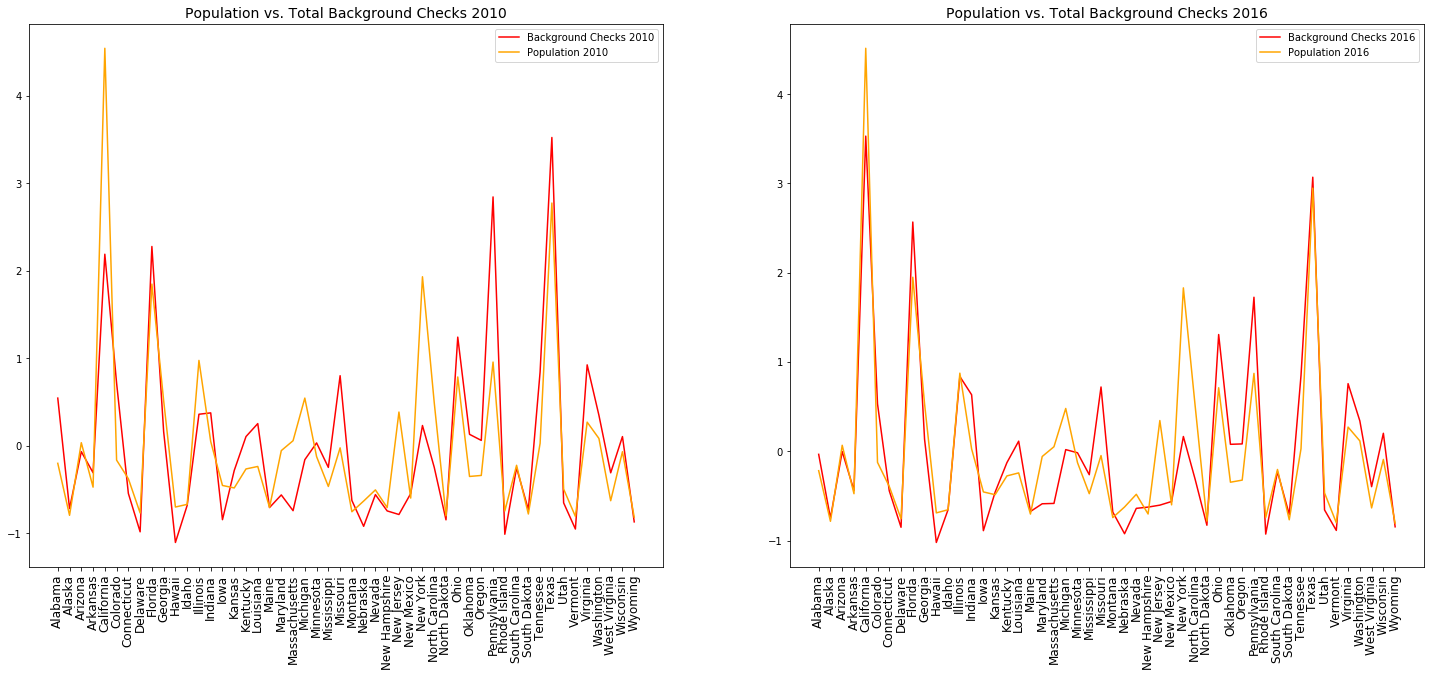

In [20]:

# Establish a figure object and create two subplots
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Plot our first figure
ax.plot(checks_pop_2010_2016_standardized['Total Checks 2010'], label = "Background Checks 2010", color='red')
ax.plot(checks_pop_2010_2016_standardized['Population 2010'], label = "Population 2010", color = 'orange')

# Clean up our first figure
ax.set_xticklabels(checks_pop_2010_2016_standardized.index.values, rotation='vertical', fontsize = 12)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels)
ax.set_title("Population vs. Total Background Checks 2010", fontsize = 14)

# Plot our second figure
ax2.plot(checks_pop_2010_2016_standardized['Total Checks 2016'], label = "Background Checks 2016", color='red')
ax2.plot(checks_pop_2010_2016_standardized['Population 2016'], label = "Population 2016", color = 'orange')

# Clean up our second figure
ax2.set_xticklabels(checks_pop_2010_2016_standardized.index.values, rotation='vertical', fontsize = 12)
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2)
ax2.set_title("Population vs. Total Background Checks 2016", fontsize = 14)




Another, potentially more helpful way to show these data would be to plot a bar graph where the first two bars 
were the number of checks and population size for 2010, and the next two were the same values for 2016. This way
viewers will be able to see side by side the changes in both values across years, and see if there is a correlation
between a population hike and a rise in background checks


Text(0.5,0,u'State')

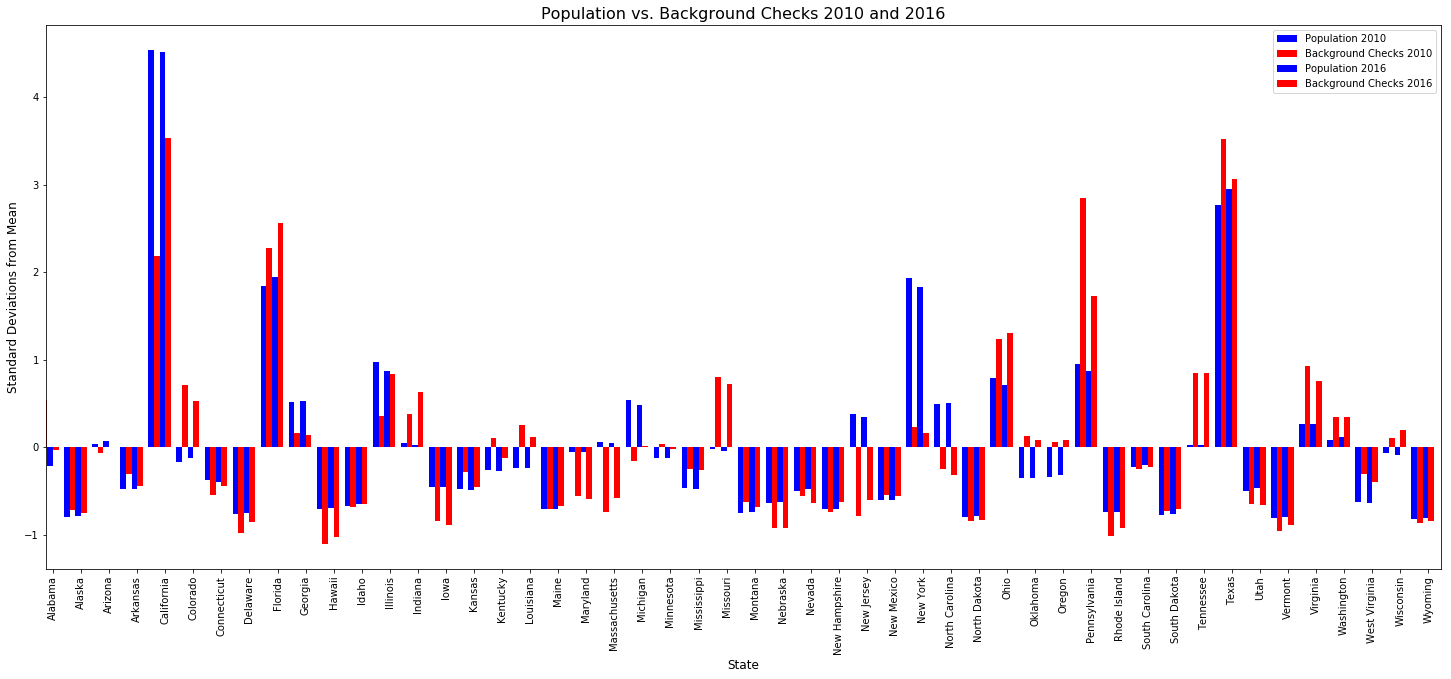

In [21]:

# Inititalize our figure object
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(1,1,1)

# Set a smaller width here to allow room for more bars
width = 0.2

#Plot our 2010 data
checks_pop_2010_2016_standardized['Population 2010'].plot(kind='bar', position=3, ax=ax, width=width, label="Population 2010", color='blue')
checks_pop_2010_2016_standardized['Total Checks 2010'].plot(kind='bar', position=2, ax=ax, width=width, label="Background Checks 2010", color='red')

# Plot our 2016 data
checks_pop_2010_2016_standardized['Population 2016'].plot(kind='bar', position=1, ax=ax, width=width, label="Population 2016", color='blue')
checks_pop_2010_2016_standardized['Total Checks 2016'].plot(kind='bar', position=0, ax=ax, width=width, label="Background Checks 2016", color='red')

# Create our legend using get_legend_handles_labels() to retrieve each axes information
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc=0)

# Set title and x,y-axis labels
ax.set_title("Population vs. Background Checks 2010 and 2016", fontsize = 16)
ax.set_ylabel("Standard Deviations from Mean", fontsize = 12)
ax.set_xlabel("State", fontsize = 12)


We see here that an increase in population does not necessarily correlate with an increase in background checks, nor does a decrease in population correlate to a decrease in background checks. This further shows that our population sizes alone cannot explain higher or lower numbers of background checks. Additional factors must be considered in order to explain why certain states have a higher than average number of background checks. While this analysis will not attempt to fully explain why certain states have higher numbers of background checks, the next step here will offer a potential first look at what we might start to examine if we were seeking to answer this question.  

## Question 3
### Which state has the highest number of background checks in 2016 and what are the general demographics of that state?

This is an attempt to look at some general info regarding a state with much higher than average numbers of background checks. 

In [22]:
# First isolate all the background check data from 2016 and then group by state, summing the totals
total_checks_2016 = checks_df[checks_df['year'] == '2016'].groupby('state')['totals'].sum()

# Then find the state with the maximum totals for 2016
total_checks_2016[total_checks_2016 == total_checks_2016.max()]


state
Kentucky    3676847
Name: totals, dtype: int64

So it looks like Kentucky had the most background checks for 2016. Lets take a look at some of the general demographics of Kentucky in 2016.

In [23]:
kentucky = census_df.loc[:, ['Fact','Kentucky']]

kentucky.head()

,Fact,Kentucky
0,"Population estimates, July 1, 2016, (V2016)","4,436,974"
1,"Population estimates base, April 1, 2010, (V2016)","4,339,344"
2,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",2.20%
3,"Population, Census, April 1, 2010","4,339,367"
4,"Persons under 5 years, percent, July 1, 2016, (V2016)",6.20%


Lets just take a look at the information we have from 2016

In [24]:
# We'll first remove all our null values from both columns
kentucky_2016 = kentucky[kentucky['Fact'].notnull()]
kentucky_2016 = kentucky_2016[kentucky_2016['Kentucky'].notnull()]

# Then we can only use our rows that are from 2016
kentucky_2016 = kentucky_2016[kentucky_2016['Fact'].str.contains("2016")]

kentucky_2016 

,Fact,Kentucky
0,"Population estimates, July 1, 2016, (V2016)","4,436,974"
1,"Population estimates base, April 1, 2010, (V2016)","4,339,344"
2,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",2.20%
4,"Persons under 5 years, percent, July 1, 2016, (V2016)",6.20%
6,"Persons under 18 years, percent, July 1, 2016, (V2016)",22.80%
8,"Persons 65 years and over, percent, July 1, 2016, (V2016)",15.60%
10,"Female persons, percent, July 1, 2016, (V2016)",50.70%
12,"White alone, percent, July 1, 2016, (V2016)",88.00%
13,"Black or African American alone, percent, July 1, 2016, (V2016)",8.30%
14,"American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)",0.30%


## Clean Up the Data

Lets define another function (this time that can remove percentage signs) to convert all our values to floating point


In [25]:
# Make a function to do the conversion

def float_convert(num):
    num = num.replace(',', '')
    num = num.replace('%', '')
    return float(num)


In [26]:
# Do the conversion
kentucky_2016['Kentucky'] = kentucky_2016['Kentucky'].apply(float_convert)

kentucky_2016

,Fact,Kentucky
0,"Population estimates, July 1, 2016, (V2016)",4436974.0
1,"Population estimates base, April 1, 2010, (V2016)",4339344.0
2,"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",2.2
4,"Persons under 5 years, percent, July 1, 2016, (V2016)",6.2
6,"Persons under 18 years, percent, July 1, 2016, (V2016)",22.8
8,"Persons 65 years and over, percent, July 1, 2016, (V2016)",15.6
10,"Female persons, percent, July 1, 2016, (V2016)",50.7
12,"White alone, percent, July 1, 2016, (V2016)",88.0
13,"Black or African American alone, percent, July 1, 2016, (V2016)",8.3
14,"American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)",0.3


Text(0.5,1,u'Race/Ethnicity Kentucky 2016')

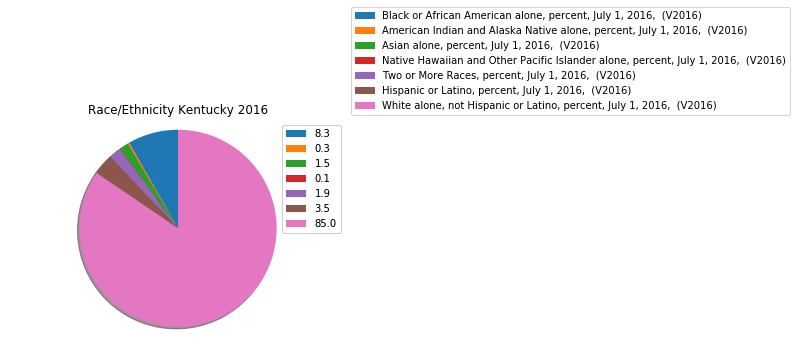

In [27]:
# Lets examine the racial demographics of Kentucky for 2016
# We use a pie chart to indicate percent of population out of roughly 100%

# Get our labels and values from rows 8-14
labels = kentucky_2016.iloc[8:15, 0]
sizes = kentucky_2016.iloc[8:15, 1]

# Create our figure
fig1, ax1 = plt.subplots()
ax1.pie(sizes, shadow=True, startangle=90)
ax1.axis('equal')

# Two legends help clarify the data
legend1 = plt.legend(sizes)
legend2 = plt.legend(sizes)

ax1.legend(labels, bbox_to_anchor=(1., 1.), loc = 'lower left')
ax1.add_artist(legend1)
ax1.add_artist(legend2)

# Add a title
ax1.set_title("Race/Ethnicity Kentucky 2016")







Text(0,0.5,u'Percentage')

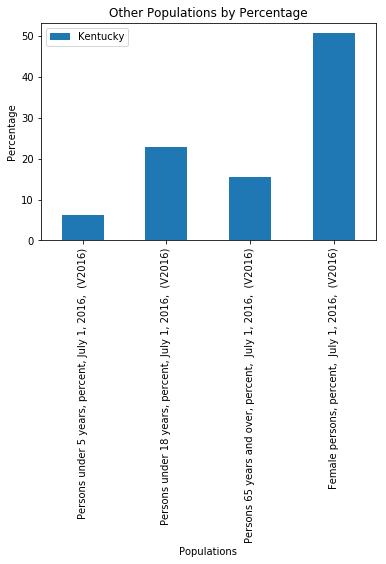

In [28]:
# Lets take a look at some other demographics for the state

other_demographics = kentucky_2016.iloc[3:7]

my_plot = other_demographics.plot(other_demographics['Fact'], kind = 'bar', )

my_plot.set_title("Other Populations by Percentage")
my_plot.set_xlabel("Populations")
my_plot.set_ylabel("Percentage")


These data are simply to get a feel for the demographics of the state with the highest number of background checks in 2016. One fact to note is that Kentucky runs monthly background checks on all persons with a concealed carry permit. Kentucky is the only state that performs monthly background checks on its concealed carry permit holders which makes this a likely reason for it having the most background checks overall. 

## Conclusion

If we were to continue this analysis, we could then start to compare the general demographics and other information we have with other states having much lower than average numbers of background checks. It's also important to note again, as in the introduction, that this data is very dependent upon individual states programs for requiring background checks, which vary widely. 

For the most part, we were able to determine the total lack of correlation between population sizes and gun background checks run. This information allows us to potentially disregard this as a large contributing factor towards an explanation of high number of background checks, and ultimately, high gun sales. This analysis might be considered as a broad first step in using these data, limited as they are, to explain how other factors are much stronger in determining gun sales in any particular state. It is my personal belief that much more detailed and cohesive data is needed in order to fully explain and analyse gun sales within the U.S, however. Thank you for reading.

-Alex McEvoy